In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(clean_data)
df_cleaned_1 = df.dropna(subset = ['exterior_color', 'interior_color'])
df_cleaned = df_cleaned_1[df_cleaned_1['price'] != 0]
df_unique = df_cleaned.drop_duplicates(subset = 'VIN', keep = False)
df_unique = df_unique.drop(columns = ['Unnamed: 0'])
df_unique

,year,make,model,price,mileage,Miles per gallon,Transmission,owner,VIN,class,...,cylinders,fuel,Drive type,Miles per gallon equivalent (MPGe),Range (when new),Time to fully charge battery (240V),Motor,Bed Length,exterior_color,interior_color
17,2018,Subaru,Impreza 2.0I Premium,17998,67000,28 city/37 hwy,Automatic,1.0,4S3GTAB63J3719160,Car - Compact,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
18,2016,Subaru,Impreza 2.0I Sport Premium,13998,120000,27 city/36 hwy,Automatic,3.0,JF1GPAP66G8241959,Car - Compact,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
19,2021,Subaru,Ascent Limited,27998,61000,20 city/26 hwy,Automatic,2.0,4S4WMAPD2M3400140,CUV - Large,...,4.0,Turbo Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Brown,Tan
20,2023,Subaru,Crosstrek,20998,88000,22 city/29 hwy,Manual 6 Speed,1.0,JF2GTAAC4P9295325,CUV - Compact,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,White,Black
21,2022,Subaru,Crosstrek Sport,27998,22000,27 city/34 hwy,Automatic,1.0,JF2GTHSC1NH258551,CUV - Compact,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Black,Gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10341,2020,Acura,MDX Technology,22998,117000,20 city/27 hwy,Automatic,1.0,5J8YD3H59LL010345,CUV - Midsize Luxury,...,6.0,Gas,Front Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Blue,Gray
10342,2016,Acura,RDX,20998,66000,20 city/28 hwy,Automatic,2.0,5J8TB3H78GL018783,CUV - Compact Luxury,...,NaN,NaN,NaN,NaN,NaN,NaN,non-electric,NaN,Blue,Gray
10343,2020,Acura,MDX SH-AWD A-Spec,32998,34000,19 city/26 hwy,Automatic,1.0,5J8YD4H08LL015157,CUV - Midsize Luxury,...,NaN,NaN,NaN,NaN,NaN,NaN,non-electric,NaN,Black,Black
10344,2021,Acura,TLX Technology,28998,39000,22 city/31 hwy,Automatic,1.0,19UUB5F45MA007014,Car - Compact Luxury,...,4.0,Turbo Gas,Front Wheel Drive,NaN,NaN,NaN,non-electric,NaN,White,Black


# Q2 What attributes are associated with fuel for used cars?
## Hypothesis 1
The factory configuration of the car is like a model, and the class and fuel should be strongly related.

## Hypothesis 2
Human factors or time factors such as year, have nothing to do with changes in vehicle gas types.

### 1. Data cleaning
(1) Fill Electric for "fuel" column if empty when its "Motor" is Electric.  
(2) Remove data whose fuel is empty.  
(3) Drop duplicates via VIN.  
(4) Drop noise column 'Unnamed: 0'  

In [68]:
import pandas as pd

clean_data = pd.read_csv("carinfo_after_pre_clean.csv")
df = pd.DataFrame(clean_data)
df.loc[(df['fuel'].isna()) & (df['Motor'] == 'Electric'), 'fuel'] = 'Electric'
df_cleaned = df.dropna(subset = ['fuel'])
df_unique = df_cleaned.drop_duplicates(subset = 'VIN', keep = False)
df_unique = df_unique.drop(columns = ['Unnamed: 0'])
df_unique

,year,make,model,price,mileage,Miles per gallon,Transmission,owner,VIN,class,...,cylinders,fuel,Drive type,Miles per gallon equivalent (MPGe),Range (when new),Time to fully charge battery (240V),Motor,Bed Length,exterior_color,interior_color
17,2018,Subaru,Impreza 2.0I Premium,17998,67000,28 city/37 hwy,Automatic,1.0,4S3GTAB63J3719160,Car - Compact,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
18,2016,Subaru,Impreza 2.0I Sport Premium,13998,120000,27 city/36 hwy,Automatic,3.0,JF1GPAP66G8241959,Car - Compact,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
19,2021,Subaru,Ascent Limited,27998,61000,20 city/26 hwy,Automatic,2.0,4S4WMAPD2M3400140,CUV - Large,...,4.0,Turbo Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Brown,Tan
20,2023,Subaru,Crosstrek,20998,88000,22 city/29 hwy,Manual 6 Speed,1.0,JF2GTAAC4P9295325,CUV - Compact,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,White,Black
21,2022,Subaru,Crosstrek Sport,27998,22000,27 city/34 hwy,Automatic,1.0,JF2GTHSC1NH258551,CUV - Compact,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Black,Gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10337,2021,Acura,RDX A-Spec,36998,10000,22 city/27 hwy,Automatic,1.0,5J8TC1H66ML023257,CUV - Midsize Luxury,...,4.0,Turbo Gas,Front Wheel Drive,NaN,NaN,NaN,non-electric,NaN,White,Red
10338,2022,Acura,MDX SH-AWD,41998,12000,19 city/25 hwy,Automatic,1.0,5J8YE1H30NL042278,CUV - Midsize Luxury,...,6.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,White,Black
10340,2016,Acura,MDX,18998,89000,19 city/27 hwy,Automatic,2.0,5FRYD3H21GB014398,CUV - Midsize Luxury,...,6.0,Gas,Front Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
10341,2020,Acura,MDX Technology,22998,117000,20 city/27 hwy,Automatic,1.0,5J8YD3H59LL010345,CUV - Midsize Luxury,...,6.0,Gas,Front Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Blue,Gray


### 2. Categorical Analysis: 
(1) Fuel and Make
Across all brands, gasoline and turbocharged gasoline are the dominant fuel types for used cars. However, certain brands, like Volvo, show a preference for specific fuel types.

(2) Fuel and Drive Type
While only two main fuel types are prevalent across drive types, the distribution of all four fuel types varies significantly by drive type.

(3) Fuel and Cylinders
There is no clear trend between fuel type and the number of cylinders. However, most cars fall within the 3-4 or 5-6 cylinder range.

(4) Fuel and Year
Gasoline and turbo gasoline have remained the primary fuel types in the used car market over time, suggesting minimal correlation between vehicle year and fuel type.

(5) Fuel and Mileage
The median mileage for each fuel type is roughly the same, indicating that mileage is not strongly related to fuel type.


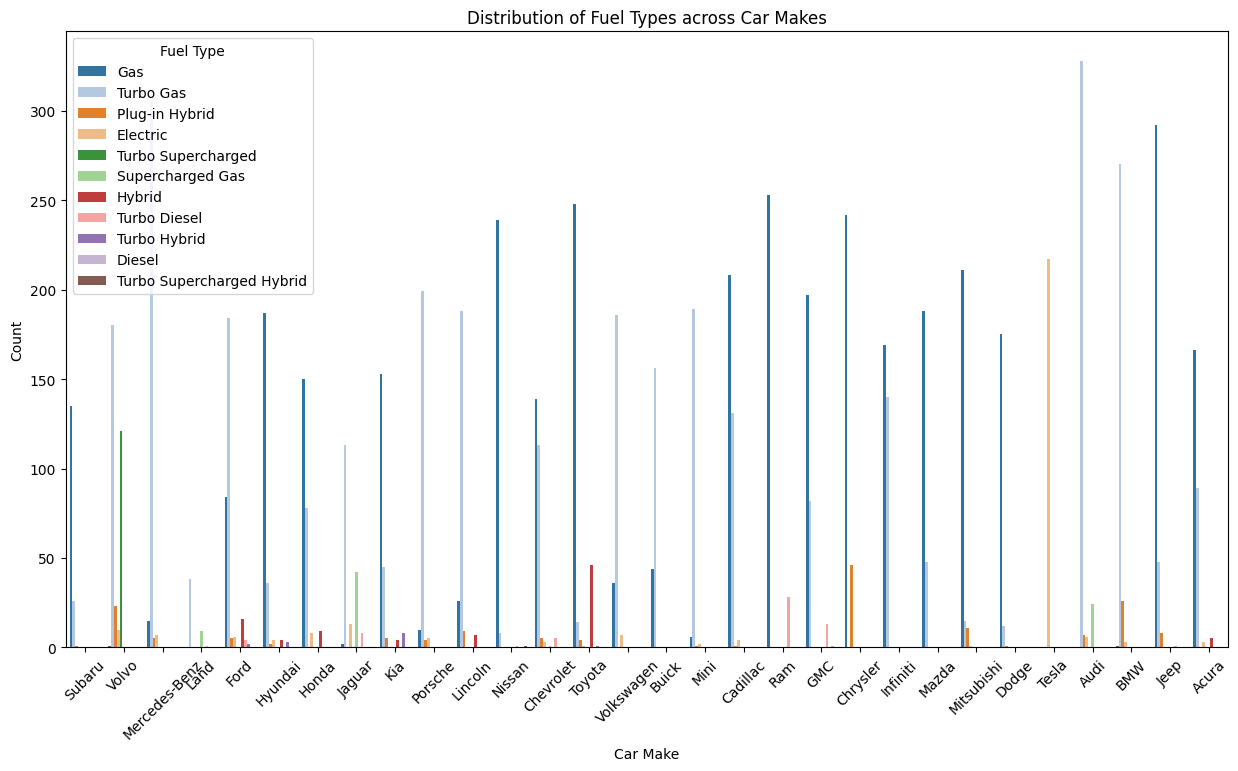

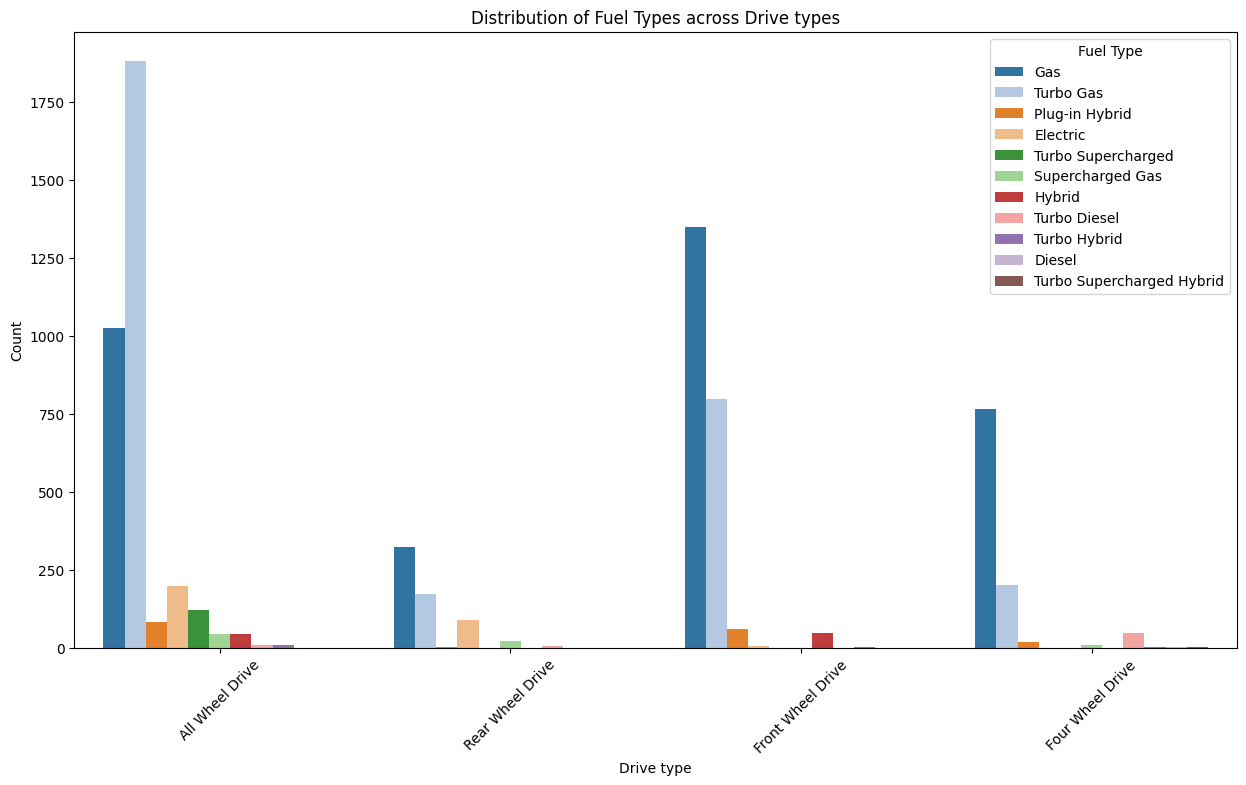

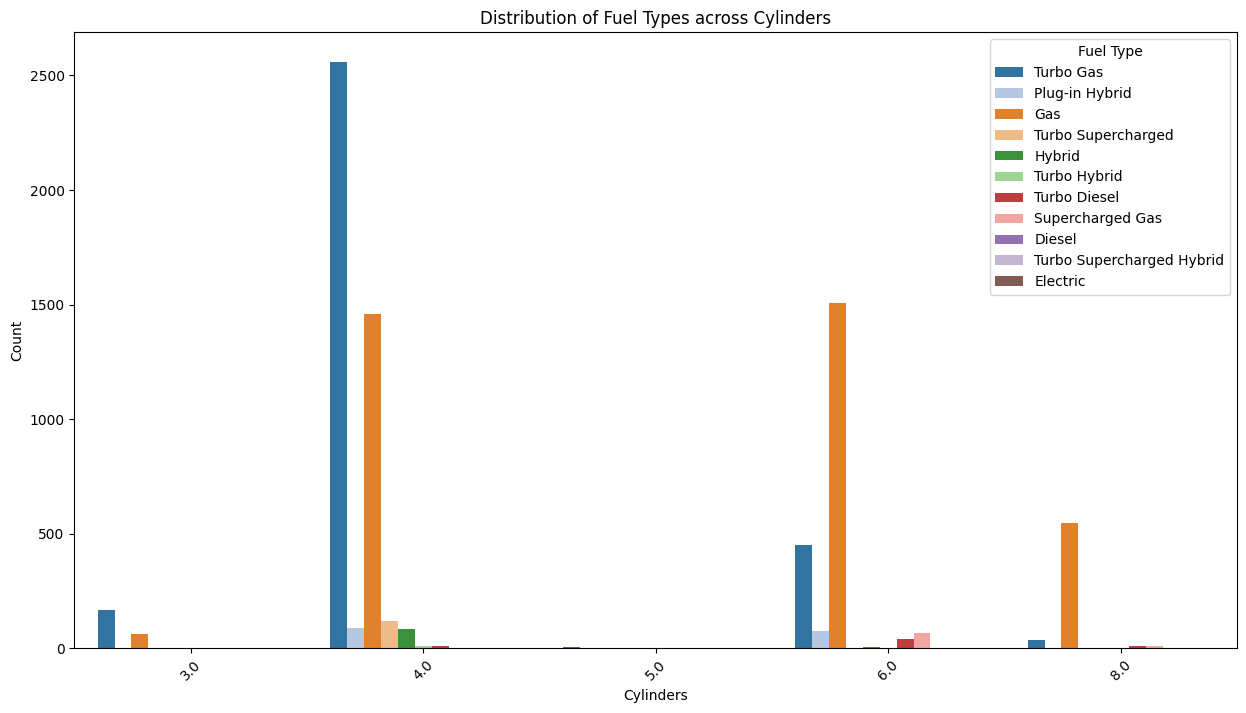

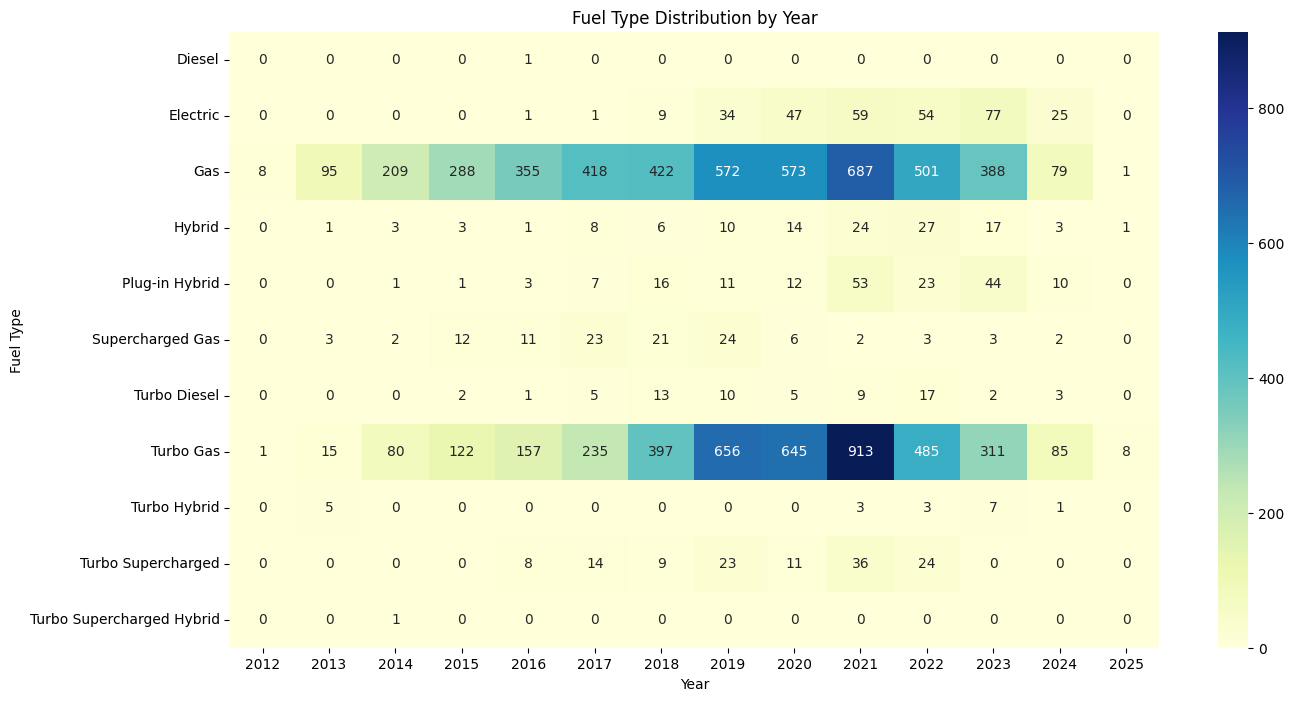

/var/folders/gw/f0bp5qm956zdx_zp29qydky00000gn/T/ipykernel_26731/1094104313.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'fuel', y = 'mileage', data = df, palette = "Set2")


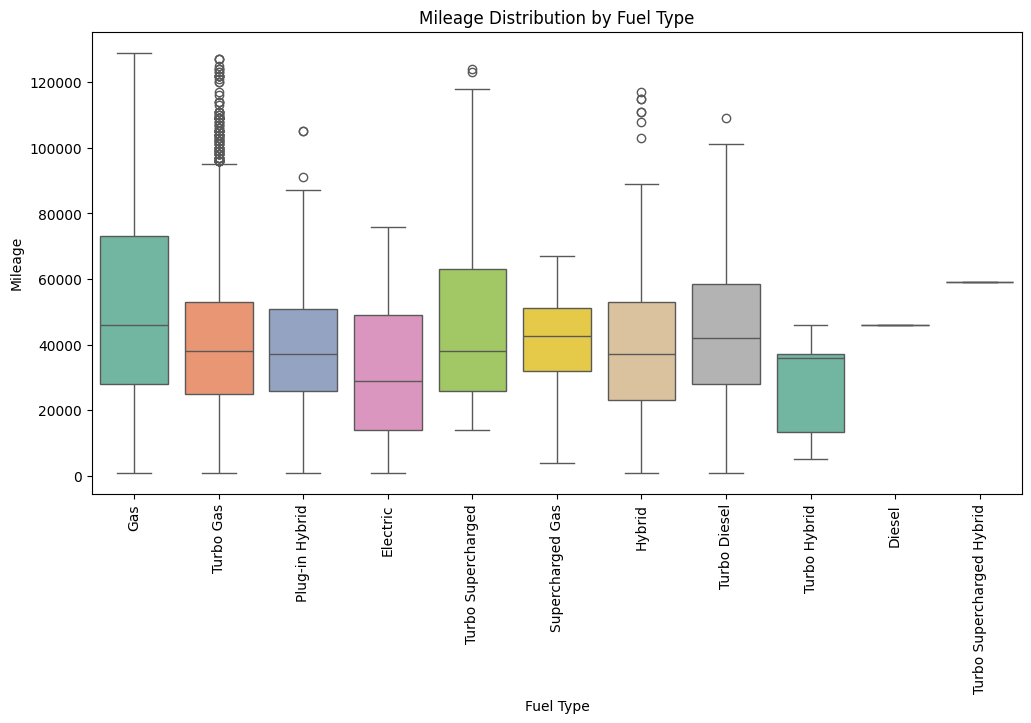

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fuel vs Make
plt.figure(figsize = (15, 8))
sns.countplot(x = 'make', hue = 'fuel', data = df_unique, palette = "tab20")
plt.xticks(rotation = 45)
plt.title('Distribution of Fuel Types across Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.legend(title = 'Fuel Type')
plt.show()

# Fuel vs Drive type
plt.figure(figsize = (15, 8))
sns.countplot(x = 'Drive type', hue = 'fuel', data = df_unique, palette = "tab20")
plt.xticks(rotation = 45)
plt.title('Distribution of Fuel Types across Drive types')
plt.xlabel('Drive type')
plt.ylabel('Count')
plt.legend(title = 'Fuel Type')
plt.show()

# Fuel vs Cylinders
plt.figure(figsize = (15, 8))
sns.countplot(x = 'cylinders', hue = 'fuel', data = df_unique, palette = "tab20")
plt.xticks(rotation = 45)
plt.title('Distribution of Fuel Types across Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.legend(title = 'Fuel Type')
plt.show()


# Fuel Type vs Year
fuel_year_counts = df.pivot_table(index = 'fuel', columns = 'year', aggfunc = 'size', fill_value=0)
plt.figure(figsize = (15, 8))
sns.heatmap(fuel_year_counts, annot = True, fmt = "d", cmap = "YlGnBu", cbar = True)
plt.title('Fuel Type Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Fuel Type')
plt.show()

# Fuel Type and Mileage
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'fuel', y = 'mileage', data = df, palette = "Set2")
plt.title('Mileage Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.xticks(rotation = 90)
plt.ylabel('Mileage')
plt.show()

### 3. Find the correlation between fuel type and the rest of the features
Significant features for fuel type:
'make', 'model', 'Miles per gallon', 'class', 'Open Recall Check', 'Drive type', 'Bed Length', 'interior_color'

In [71]:
from scipy.stats import chi2_contingency, f_oneway
import pandas as pd

p_values = {}

# Check all features except 'fuel'
for feature in df_unique.columns:
    if feature == 'fuel':
        continue

    if df_unique[feature].dtype == 'object' or df_unique[feature].dtype.name == 'category':
        # If the feature is categorical, use the Chi-Square test
        contingency_table = pd.crosstab(df_unique['fuel'], df_unique[feature])
        try:
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            p_values[feature] = p
        except ValueError as e:
            print(f"Error for feature '{feature}': {e}")
            p_values[feature] = None  # Assign None if there is an error in processing
    else:
        # If the feature is numeric, use ANOVA (one-way)
        try:
            groups = [df_unique[df_unique['fuel'] == fuel][feature].dropna() for fuel in df_unique['fuel'].unique()]
            _, p = f_oneway(*groups)
            p_values[feature] = p
        except ValueError as e:
            print(f"Error for feature '{feature}': {e}")
            p_values[feature] = None  # Assign None if there is an error in processing

# Output the p-values
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Feature', 'p-value'])
print(p_values_df)

significant_features = p_values_df[p_values_df['p-value'] < 0.05]['Feature'].tolist()
print(f"Significant features: {significant_features}")

                                Feature        p-value
0                                  year  9.901719e-102
1                                  make   0.000000e+00
2                                 model   0.000000e+00
3                                 price  1.523378e-128
4                               mileage   2.614113e-73
5                      Miles per gallon   0.000000e+00
6                          Transmission   4.490467e-01
7                                 owner   1.375909e-14
8                                   VIN   4.891056e-01
9                                 class   0.000000e+00
10               Auction Brand / Issues   9.999797e-01
11                    Accident / Damage   2.908930e-04
12                    Open Recall Check   0.000000e+00
13                       Odometer Check   7.506976e-01
14                  Certified Pre-Owned   8.499720e-04
15                            cylinders            NaN
16                           Drive type  1.900100e-305
17   Miles

/var/folders/gw/f0bp5qm956zdx_zp29qydky00000gn/T/ipykernel_26731/3363404035.py:24: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  _, p = f_oneway(*groups)
